In [8]:
#Setup and Functions
import numpy as np
import math as m
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
#from intersect import intersection

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



Material: 1-1018
a_avg = 0.966 in
a/W = 0.484
a/W: Sample is Good
P_max = 12602.71283 lbf
f(a_w) = 9.195
Intx 412    0.01937
Name: Elongation, dtype: float64 412    10175.15343
Name: Load, dtype: float64


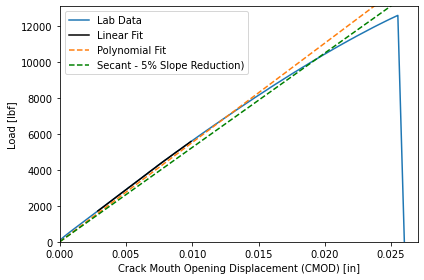


Material: 2-1018
a_avg = 0.940 in
a/W = 0.471
a/W: Sample is Good
P_max = 8601.98959 lbf
f(a_w) = 8.846
Intx Series([], Name: Elongation, dtype: float64) Series([], Name: Load, dtype: float64)


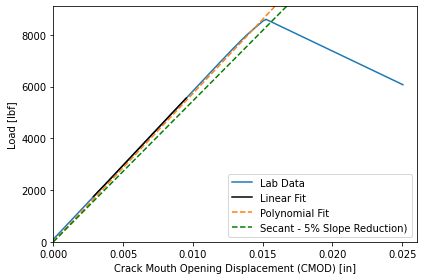


Material: 3-2024
a_avg = 0.981 in
a/W = 0.491
a/W: Sample is Good
P_max = 4820.08173 lbf
f(a_w) = 9.384
Intx Series([], Name: Elongation, dtype: float64) Series([], Name: Load, dtype: float64)


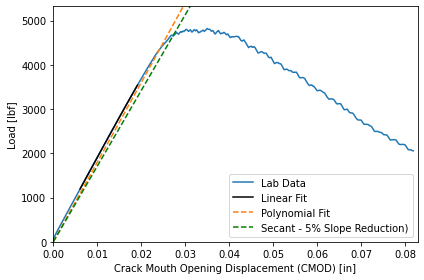


Material: 4-2024
a_avg = 1.508 in
a/W = 0.501
a/W: Sample is Good
P_max = 7613.72141 lbf
f(a_w) = 9.683
Intx 334    0.02919
Name: Elongation, dtype: float64 334    7205.82985
Name: Load, dtype: float64


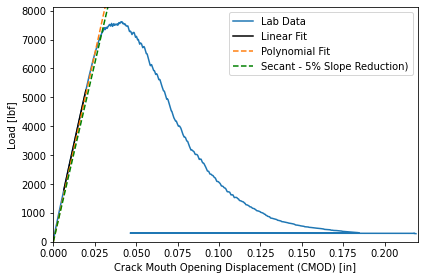


Material: 5-6061
a_avg = 1.412 in
a/W = 0.471
a/W: Sample is Good
P_max = 10484.14682 lbf
f(a_w) = 8.863
Intx Series([], Name: Elongation, dtype: float64) Series([], Name: Load, dtype: float64)


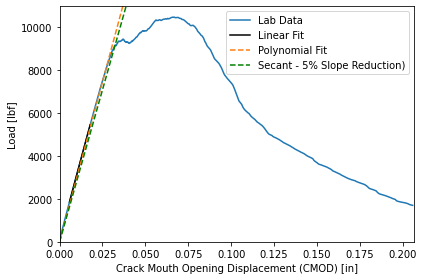


Material: 6-6061
a_avg = 0.984 in
a/W = 0.489
a/W: Sample is Good
P_max = 5307.96622 lbf
f(a_w) = 9.333
Intx 322    0.02763
Name: Elongation, dtype: float64 322    4781.27431
Name: Load, dtype: float64


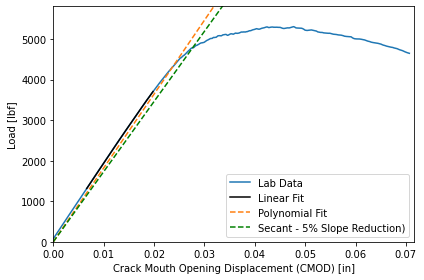


Material: 7-7075
a_avg = 1.477 in
a/W = 0.492
a/W: Sample is Good
P_max = 5638.07277 lbf
f(a_w) = 9.427
Intx Series([], Name: Elongation, dtype: float64) Series([], Name: Load, dtype: float64)


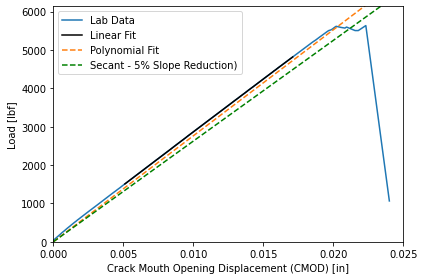


Material: 8-7075
a_avg = 1.442 in
a/W = 0.481
a/W: Sample is Good
P_max = 5767.10811 lbf
f(a_w) = 9.109
Intx Series([], Name: Elongation, dtype: float64) Series([], Name: Load, dtype: float64)


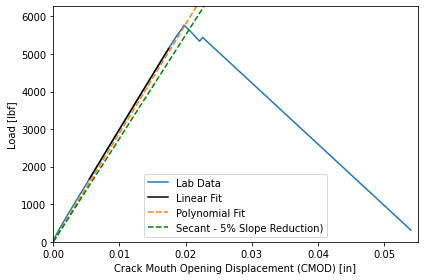

In [23]:
data_file = pd.read_excel('/content/drive/MyDrive/MMAE419/Fracture_lab/Fracture_BB_F2022.xlsx', sheet_name=None)

def intersection(f, g):
  idx = np.argwhere(np.isclose(f, g, atol=2)).reshape(-1)
  return idx

for name, sheet in data_file.items():
    sheet['sheet'] = name
    sheet = sheet.rename(columns=lambda x: x.split('\n')[-1])
    sheet = sheet.to_numpy()
    print(f'\nMaterial: {name}')
    #Data
    B = sheet[0,1] #in
    W = float(sheet[1,1]) #in
    Rate = sheet[2,1] #in/min
    Sigma_yield = sheet[3,1] #ksi
    
    a_1 = sheet[0,5]
    a_2 = sheet[1,5]
    a_3 = sheet[2,5]
    a_4 = sheet[3,5]
    a_5 = sheet[4,5]
    

    elongation = sheet[9:,0] #in
    load = sheet[9:,1] #lbf
    
    #Analysis
    a_avg = (a_1 + a_2 + a_3 + a_4 + a_5) / 5; print(f'a_avg = {a_avg:.3f} in')
    a_w = a_avg/W; print(f'a/W = {a_w:.3f}')
    if a_w <= 0.55 and a_w >= 0.45:
      print('a/W: Sample is Good')
    else:
      print('a/W: Sample is NOT Good')

    P_max = max(load); print(f'P_max = {P_max} lbf')
    f_a_w = (2+a_w)*(0.886+4.64*(a_w)-13.32*((a_w)**2)+14.72*((a_w)**3)-5.6*((a_w)**4))/((1-a_w)**(3/2)); print(f'f(a_w) = {f_a_w:.3f}')

    data_col_names = ['Elongation','Load']
    test_data = pd.read_excel('/content/drive/MyDrive/MMAE419/Fracture_lab/Fracture_BB_F2022.xlsx', sheet_name=name, 
                          skiprows=9, usecols='A:B', names = data_col_names)

    elongation = test_data.Elongation #in
    load = test_data.Load #lbf

    #Polyfits
    polyfit = np.polyfit(elongation[100:250], load[100:250], 1)
    line_x = np.arange(0,np.max(elongation)+0.1,0.001)
    line_y = polyfit[0]*line_x
    polyfit_95_offset = 0.95*polyfit[0]
    line_y_95_offset = polyfit_95_offset*line_x
    line_y_95_real = polyfit_95_offset*elongation

    #Difference function
    ind = intersection(line_y_95_real, load)
    print("Intx", elongation[ind], load[ind])
    #plt.plot(elongation, load, elongation, line_y_95_real)

    #Plots
    plt.figure()
    plt.plot(elongation, load, label = 'Lab Data')
    plt.plot(elongation[100:250],load[100:250],'k', label = 'Linear Fit')
    plt.plot(line_x, line_y, '--',label = 'Polynomial Fit')
    plt.plot(line_x,line_y_95_offset,'g--', label = 'Secant - 5% Slope Reduction)')
    plt.xlabel('Crack Mouth Opening Displacement (CMOD) [in]')
    plt.ylabel('Load [lbf]')
    plt.legend()
    plt.xlim(0,np.max(elongation)+0.001)
    plt.ylim(0,np.max(load)+500)
    plt.tight_layout()
    plt.show()

Material: 1-1018
a_avg = 0.966 in
a/W = 0.484
a/W: Sample is Good
a_1/a_avg = 0.972
a_2/a_avg = 1.023
a_3/a_avg = 1.009
a_4/a_avg = 1.017
a_5/a_avg = 0.980
P_max = 12602.71283 lbf
f(a_w) = 9.195


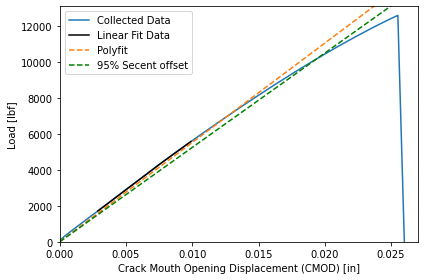

In [7]:
#TEST
mat = '1-1018'
data = pd.read_excel('/content/drive/MyDrive/MMAE419/Fracture_lab/Fracture_BB_F2022.xlsx', sheet_name=mat)
print(f'Material: {mat}')

#Data
B = data.iat[0,1] #in
W = float(data.iat[1,1])
Rate = data.iat[2,0] #in/min
Sigma_yield = data.iat[3,0] #ksi

a_1 = data.iat[0,5]
a_2 = data.iat[1,5]
a_3 = data.iat[2,5]
a_4 = data.iat[3,5]
a_5 = data.iat[4,5]

data_col_names = ['Elongation','Load']
test_data = pd.read_excel('/content/drive/MyDrive/MMAE419/Fracture_lab/Fracture_BB_F2022.xlsx', sheet_name=mat, 
                          skiprows=9, usecols='A:B', names = data_col_names)

elongation = test_data.Elongation #in
load = test_data.Load #lbf

#Analysis
a_avg = (a_1 + a_2 + a_3 + a_4 + a_5) / 5; print(f'a_avg = {a_avg:.3f} in')
a_w = a_avg/W; print(f'a/W = {a_w:.3f}')
if a_w <= 0.55 and a_w >= 0.45:
  print('a/W: Sample is Good')
else:
  print('a/W: Sample is NOT Good')

a_1_avg = a_1/a_avg; print(f'a_1/a_avg = {a_1_avg:.3f}')
a_2_avg = a_2/a_avg; print(f'a_2/a_avg = {a_2_avg:.3f}')
a_3_avg = a_3/a_avg; print(f'a_3/a_avg = {a_3_avg:.3f}')
a_4_avg = a_4/a_avg; print(f'a_4/a_avg = {a_4_avg:.3f}')
a_5_avg = a_5/a_avg; print(f'a_5/a_avg = {a_5_avg:.3f}')

P_max = max(load); print(f'P_max = {P_max} lbf')
f_a_w = (2+a_w)*(0.886+4.64*(a_w)-13.32*((a_w)**2)+14.72*((a_w)**3)-5.6*((a_w)**4))/((1-a_w)**(3/2)); print(f'f(a_w) = {f_a_w:.3f}')


#Polyfits
polyfit = np.polyfit(elongation[100:250], load[100:250], 1)
line_x = np.arange(0,np.max(elongation)+0.1,0.001)
line_y = polyfit[0]*line_x
polyfit_95_offset = 0.95*polyfit[0]
line_y_95_offset = polyfit_95_offset*line_x

# offset = [line_x, line_y_95_offset]; print(offset)
# real = [elongation, load];
# print(real.intersection(offset))

#Plots
plt.figure()
plt.plot(elongation, load, label = 'Collected Data')
plt.plot(elongation[100:250],load[100:250],'k', label = 'Linear Fit Data')
plt.plot(line_x, line_y, '--',label = 'Polyfit')
plt.plot(line_x,line_y_95_offset,'g--', label = '95% Secent offset')
plt.xlabel('Crack Mouth Opening Displacement (CMOD) [in]')
plt.ylabel('Load [lbf]')
plt.legend()
plt.xlim(0,np.max(elongation)+0.001)
plt.ylim(0,np.max(load)+500)
plt.tight_layout()
plt.show()